In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive

/content/drive


In [4]:
cd My Drive

/content/drive/My Drive


In [5]:
!pip3 install xlrd
import pandas as pd

**READING DATA**

In [6]:
import xlrd
wb = xlrd.open_workbook("Company Descriptions.xlsx")   
sheet = wb.sheet_by_index(0)
sheet.cell_value(19965, 1)

'StackMob is a mobile platform helping developers create a mobile business by letting them build, deploy and grow mobile applications.'

In [7]:
wb1 = xlrd.open_workbook("Industry Segments - Top 10 Keywords.xlsx")
sheet1 = wb1.sheet_by_index(0)
sheet1.cell_value(1, 1)

'Security, systems, video, surveillance, service, aircraft, military, system, technology, flight'

**TOKENISING KEYWORD DATA**

In [8]:

cla = []
keyw = []
#list = []
for i in range(1,28):

  st =  sheet1.cell_value(i, 1)
  st1 = st.replace(',',' ')
  cla.append(st1.split())
  keyw = keyw + cla[i-1]
  
print(cla[0])  
print(keyw)  

['Security', 'systems', 'video', 'surveillance', 'service', 'aircraft', 'military', 'system', 'technology', 'flight']
['Security', 'systems', 'video', 'surveillance', 'service', 'aircraft', 'military', 'system', 'technology', 'flight', 'Service', 'cleantech', 'water', 'agriculture', 'traits', 'food', 'plant', 'crop', 'irrigation', 'agricultural', 'Developer', 'treatment', 'drug', 'diseases', 'technology', 'disease', 'cancer', 'drugs', 'development', 'therapeutics', 'Service', 'platform', 'online', 'management', 'data', 'marketing', 'advertising', 'technology', 'web', 'software', 'Service', 'wireless', 'network', 'data', 'internet', 'applications', 'technology', 'networks', 'mobile', 'systems', 'Service', 'cleantech', 'water', 'energy', 'waste', 'treatment', 'technology', 'environment', 'systems', 'management', 'Online', 'users', 'web', 'service', 'platform', 'social', 'site', 'content', 'mobile', 'search', 'Technology', 'storage', 'energy', 'systems', 'applications', 'data', 'developer

In [9]:
!pip install flashtext==1.8

  Created wheel for flashtext: filename=flashtext-1.8-py2.py3-none-any.whl size=6142 sha256=a0217795bdfc2b4f61fea49b2277a27cfb5f7a2212a055e9e48d3ebbf70ac55a
  Stored in directory: /root/.cache/pip/wheels/c1/65/5e/962efede96fb210c96e15e019b553a741d334f720b6313e29a
Successfully built flashtext


**CREATING KEYWORD PROCESSOR OBJECT**

In [10]:
from flashtext.keyword import KeywordProcessor
kp = [None]*28
#print(type(KeywordProcessor()))
kp[0]=KeywordProcessor()
for word in keyw:
    kp[0].add_keyword(word)
for i in range(1,28):
    kp[i]=KeywordProcessor()
    for word in cla[i-1]:
      kp[i].add_keyword(word)
print(kp)

[<flashtext.keyword.KeywordProcessor object at 0x7f795b063ac8>, <flashtext.keyword.KeywordProcessor object at 0x7f795b07e550>, <flashtext.keyword.KeywordProcessor object at 0x7f795b078198>, <flashtext.keyword.KeywordProcessor object at 0x7f795b0780b8>, <flashtext.keyword.KeywordProcessor object at 0x7f797ded7278>, <flashtext.keyword.KeywordProcessor object at 0x7f797ded7128>, <flashtext.keyword.KeywordProcessor object at 0x7f797ded7048>, <flashtext.keyword.KeywordProcessor object at 0x7f797ded7160>, <flashtext.keyword.KeywordProcessor object at 0x7f797ded7080>, <flashtext.keyword.KeywordProcessor object at 0x7f797ded7208>, <flashtext.keyword.KeywordProcessor object at 0x7f797ded7198>, <flashtext.keyword.KeywordProcessor object at 0x7f797ded72b0>, <flashtext.keyword.KeywordProcessor object at 0x7f797ded72e8>, <flashtext.keyword.KeywordProcessor object at 0x7f797ded70b8>, <flashtext.keyword.KeywordProcessor object at 0x7f797df42f98>, <flashtext.keyword.KeywordProcessor object at 0x7f797d

**PERCENTAGE MATCHING**

In [0]:
def percentage1(dum0,dumx):
    try:
        ans=float(dumx)/float(dum0)
        ans=ans*100
    except:
        return 0
    else:
        return ans

**FINDING** **CATEGORY** 

In [0]:
def find_category(stri):
  y = []
  for i in range(1,29):
    y.append(len(kp[i-1].extract_keywords(stri)))
  Total_matches=y[0]
  if(y[0]==0):
    return -1
  else:
    per = []
    for i in range(1,28):
      per.append(float(percentage1(y[0],y[i])))
    maxpos = per.index(max(per))
    return maxpos  




In [0]:
import csv
row_list = [["company","industry_segments"]]
for i in range(1,19966):
  j=find_category(sheet.cell_value(i, 2))
  #sheet1.cell_value(j+1, 0)
  row_list.append([sheet.cell_value(i,0),sheet1.cell_value(j+1, 0)])
with open('isb31latest.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerows(row_list) 
  
  


In [14]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('Company Descriptions.xlsx')

print("Column headings:")
df.head()

Column headings:


,company_name,company_short_description,company_description
0,Codementor,Codementor is an online marketplace connecting...,Codementor provides live 1:1 help for software...
1,AgShift,AgShift is designing world's most advanced aut...,AgShift solution blends Deep Learning with Com...
2,Shipsi,Shipsi empowers any retailer with the ability ...,Shipsi empowers any retailer with the ability ...
3,OpenNews,"OpenNews helps a global network of developers,...","We're helping a global network of developers, ..."
4,Biobot Analytics,Biobot Analytics analyzes city sewage to estim...,Biobot Analytics analyzes sewage to estimate o...


"**TF-IDF** ***VECTORISATION*** 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(df.company_description.astype('U'))
text = tfidf.transform(df.company_description.astype('U'))

**FINDING OPTIMAL CLUSTERS**

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


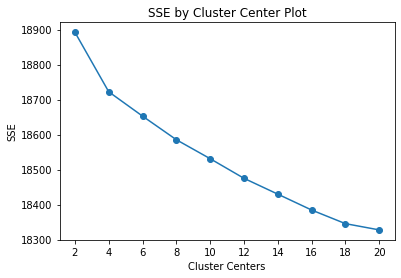

In [16]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
find_optimal_clusters(text, 20)    

By elbow method number of clusters is 4

In [0]:
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

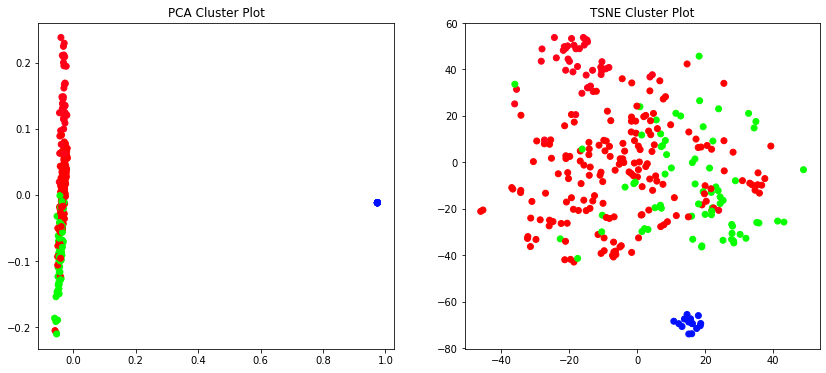

In [24]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [25]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
people,new,world,based,com,online,technology,mobile,company,platform

Cluster 1
based,service,company,business,provides,management,software,services,solutions,data

Cluster 2
esports,espn,especially,escape,errors,error,erp,established,zynga,nan

Cluster 3
diseases,development,therapeutics,care,clinical,health,patients,treatment,medical,company


In [0]:
import csv
row_list = [["company","cluster"]]
for i in range(1,19966):
  j=clusters[i-1]
  #sheet1.cell_value(j+1, 0)
  row_list.append([sheet.cell_value(i,0),j])
with open('isb32lat.csv', 'w', newline='') as file:
  writer = csv.writer(file)
  writer.writerows(row_list)